### 1. Museum site planning revisit.

In [5]:
#a
using JuMP, Ipopt, LinearAlgebra

A = [0 1; -1 0; 0 -1; 3 -1; 2/3 1];
b = [500;0;0;1500;700]

m = Model(solver=IpoptSolver(print_level = 0))
@variable(m, r1 >= 0)           # radius
@variable(m, r2 >= 0)           
@variable(m, x[1:2])           # coordinates of center
@variable(m,y[1:2])

for i = 1:size(A,1)
    @constraint(m, A[i,:]'*x + r1*norm(A[i,:]) <= b[i])
end
for i = 1:size(A,1)
    @constraint(m, A[i,:]'*y + r2*norm(A[i,:]) <= b[i])
end

@NLconstraint(m,(x[1]-y[1])^2 + (x[2]-y[2])^2 >= (r1+r2)^2)
@NLobjective(m, Max, r1^2 + r2^2)     # maximize radius

status = solve(m)
center1 = getvalue(x)
radius1 = getvalue(r1)
center2 = getvalue(y)
radius2 = getvalue(r2)
println(status)
println("The maximum area is:", getobjectivevalue(m))
println("The coordinates of one museum are: ", center1)
println("The largest possible radius of that museum is: ", radius1)
println("The coordinates of one museum are: ", center2)
println("The largest possible radius of that museum is: ", radius2)


Optimal
The maximum area is:61302.90914693383
The coordinates of one museum are: [41.8687, 41.8687]
The largest possible radius of that museum is: 41.86867640557496
The coordinates of one museum are: [244.029, 244.029]
The largest possible radius of that museum is: 244.02852923988024


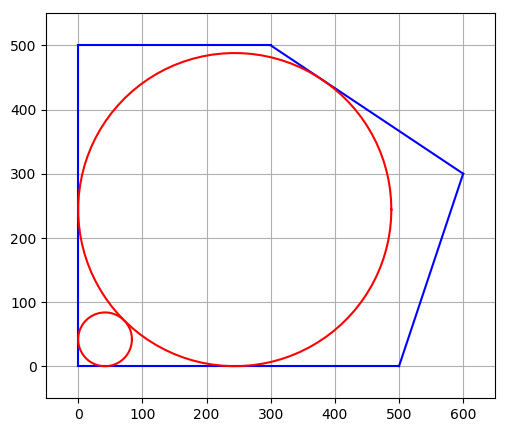

In [6]:
using PyPlot
function plot_site()
plot([0,0], [0,500], "b-")
plot([0,500], [0,0], "b-")
plot([500,600], [0,300],"b-")
plot([300,600], [500,300],"b-")
plot([0,300], [500,500],"b-")
axis("image")
axis([-.5,6.5,-.5,5.5]*100)
grid()
end
figure(figsize=(6,5))
plot_site()
t = range(0,stop=2*pi,length=100)
x1 = center1;
r1 = radius1
plot(x1[1] .+ r1*cos.(t), x1[2] .+ r1*sin.(t), "r")
x2 = center2;
r2 = radius2
plot(x2[1] .+ r2*cos.(t), x2[2] .+ r2*sin.(t), "r")
;

Yes, I think this is an optimal solution.

In [7]:
#b
using JuMP, Ipopt, LinearAlgebra

A = [0 1; -1 0; 0 -1; 3 -1; 2/3 1];
b = [500;0;0;1500;700]

m = Model(solver=IpoptSolver(print_level = 0))
@variable(m, r1 >= 0)           # radius
@variable(m, r2 >= 0)           
@variable(m, x[1:2])           # coordinates of center
@variable(m,y[1:2])

setvalue(x, [400,100])
setvalue(y, [400,100])

for i = 1:size(A,1)
    @constraint(m, A[i,:]'*x + r1*norm(A[i,:]) <= b[i])
end
for i = 1:size(A,1)
    @constraint(m, A[i,:]'*y + r2*norm(A[i,:]) <= b[i])
end

@NLconstraint(m,(x[1]-y[1])^2 + (x[2]-y[2])^2 >= (r1+r2)^2)
@NLobjective(m, Max, r1^2 + r2^2)     # maximize radius

status = solve(m)
center1 = getvalue(x)
radius1 = getvalue(r1)
center2 = getvalue(y)
radius2 = getvalue(r2)
println(status)
println("The maximum area is:", getobjectivevalue(m))
println("The coordinates of one museum are: ", center1)
println("The largest possible radius of that museum is: ", radius1)
println("The coordinates of one museum are: ", center2)
println("The largest possible radius of that museum is: ", radius2)

Optimal
The maximum area is:62258.40441291518
The coordinates of one museum are: [538.057, 278.747]
The largest possible radius of that museum is: 52.04307187259394
The coordinates of one museum are: [244.029, 244.029]
The largest possible radius of that museum is: 244.02852923988047


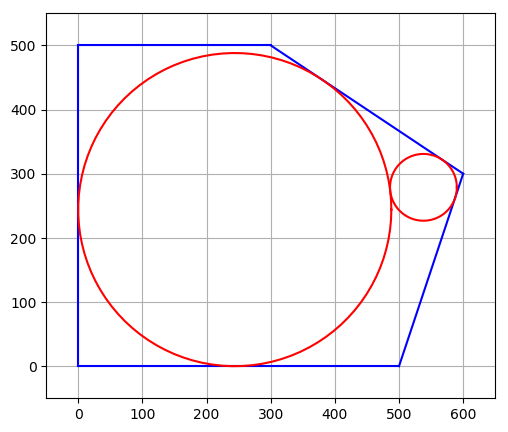

In [8]:
using PyPlot
function plot_site()
plot([0,0], [0,500], "b-")
plot([0,500], [0,0], "b-")
plot([500,600], [0,300],"b-")
plot([300,600], [500,300],"b-")
plot([0,300], [500,500],"b-")
axis("image")
axis([-.5,6.5,-.5,5.5]*100)
grid()
end
figure(figsize=(6,5))
plot_site()
t = range(0,stop=2*pi,length=100)
x1 = center1;
r1 = radius1
plot(x1[1] .+ r1*cos.(t), x1[2] .+ r1*sin.(t), "r")
x2 = center2;
r2 = radius2
plot(x2[1] .+ r2*cos.(t), x2[2] .+ r2*sin.(t), "r")
;

In [9]:
using JuMP, Ipopt, LinearAlgebra

A = [0 1; -1 0; 0 -1; 3 -1; 2/3 1];
b = [500;0;0;1500;700]

m = Model(solver=IpoptSolver(print_level = 0))
@variable(m, r1 >= 0)           # radius
@variable(m, r2 >= 0)           
@variable(m, x[1:2])           # coordinates of center
@variable(m,y[1:2])

setvalue(x, [400,100])
setvalue(y, [400,400])

for i = 1:size(A,1)
    @constraint(m, A[i,:]'*x + r1*norm(A[i,:]) <= b[i])
end
for i = 1:size(A,1)
    @constraint(m, A[i,:]'*y + r2*norm(A[i,:]) <= b[i])
end

@NLconstraint(m,(x[1]-y[1])^2 + (x[2]-y[2])^2 >= (r1+r2)^2)
@NLobjective(m, Max, r1^2 + r2^2)     # maximize radius

status = solve(m)
center1 = getvalue(x)
radius1 = getvalue(r1)
center2 = getvalue(y)
radius2 = getvalue(r2)
println(status)
println("The maximum area is:", getobjectivevalue(m))
println("The coordinates of one museum are: ", center1)
println("The largest possible radius of that museum is: ", radius1)
println("The coordinates of one museum are: ", center2)
println("The largest possible radius of that museum is: ", radius2)

Optimal
The maximum area is:61612.69279013569
The coordinates of one museum are: [244.029, 244.029]
The largest possible radius of that museum is: 244.0285292398796
The coordinates of one museum are: [45.4177, 454.582]
The largest possible radius of that museum is: 45.41772459246412


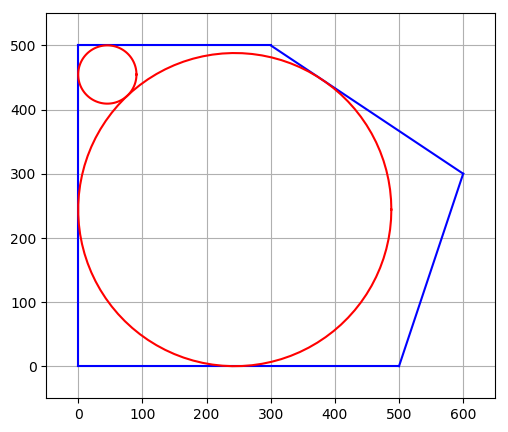

In [10]:
using PyPlot
function plot_site()
plot([0,0], [0,500], "b-")
plot([0,500], [0,0], "b-")
plot([500,600], [0,300],"b-")
plot([300,600], [500,300],"b-")
plot([0,300], [500,500],"b-")
axis("image")
axis([-.5,6.5,-.5,5.5]*100)
grid()
end
figure(figsize=(6,5))
plot_site()
t = range(0,stop=2*pi,length=100)
x1 = center1;
r1 = radius1
plot(x1[1] .+ r1*cos.(t), x1[2] .+ r1*sin.(t), "r")
x2 = center2;
r2 = radius2
plot(x2[1] .+ r2*cos.(t), x2[2] .+ r2*sin.(t), "r")
;

The one with initialized location of center as [400,100], [400,100] has larger area being covered. There are different solutions because this is a nonlinear problem, where the solver cannot determine whether it reaches at a local maximum or a global maximum, therefore, given different starting point, it may reaches at different peaks (local maximums).

### 2. Fertilizer influence model

In [11]:
#data
x = [-5,-3,-1,1,3,5]
y = [427,451,379,221,160,126]
;

In [17]:
using JuMP, Ipopt
m = Model(solver=IpoptSolver(print_level = 0))

@variable(m, k[1:4])
setvalue(k,[500,-200,-0.1,0.5])
@NLobjective(m, Min, sum((y[i] - (k[1] + k[2]*exp(k[3]*x[i]^2 + k[4]*x[i])))^2  for i in 1:6))

status = solve(m)
coe = getvalue(k)
println(status)
println(getobjectivevalue(m))
println(coe)

Optimal
2443.562435865541
[452.528, -139.632, -0.0518728, 0.424903]


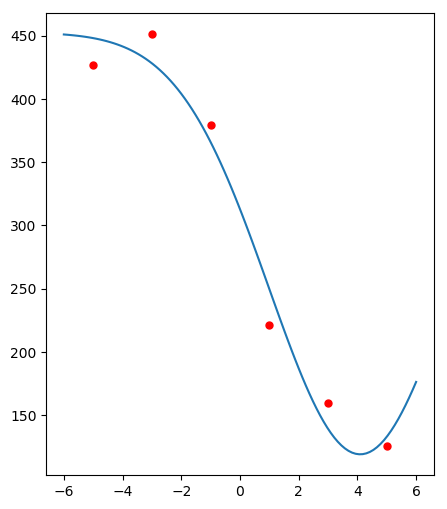

In [23]:
xfine = range(-6,stop = 6,length  = 100)
yfine = []
for i in 1:length(xfine)
    push!(yfine,coe[1]+ coe[2]exp(coe[3]*xfine[i].^2 + coe[4]*xfine[i])) 
end
figure(figsize=(5:6))
plot(x,y,"r.", markersize=10)
plot( xfine, yfine)
;